In [ ]:
# library yang dibutuhkan dalam mengerjakan tugas ini
from keras import models
from keras import layers
import numpy as np
from keras import optimizers

In [ ]:
# mengambil dataset imdb
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# mengambil data berupa string imdb
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# label vextorize
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Latih model tanpa menggunakan Early Stopping**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    validation_data=(x_val, y_val),
                    )

Epoch 1/200
469/469 [==============================] - 4s 8ms/step - loss: 0.6280 - accuracy: 0.7279 - val_loss: 0.2812 - val_accuracy: 0.8804
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1604 - accuracy: 0.9423 - val_loss: 0.3088 - val_accuracy: 0.8762
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0866 - accuracy: 0.9752 - val_loss: 0.5231 - val_accuracy: 0.8687
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0455 - accuracy: 0.9882 - val_loss: 0.3811 - val_accuracy: 0.8500
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0542 - accuracy: 0.9875 - val_loss: 0.8935 - val_accuracy: 0.8634
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0269 - accuracy: 0.9971 - val_loss: 1.0820 - val_accuracy: 0.8639
Epoch 7/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0170 - accuracy: 0.9972 - val_loss: 1.0531 - val_accuracy: 0.8570

Dari hasil model diatas , kita dapat melihat bahwa adanya inkonsistensi nilai val_accuracy yang mana terjadi penurunan hingga ke epoch 200 sebesar 0.8161. oleh karena itu, selanjutnya kita akan mencoba menggunakan early stopping untuk meningkatkan akurasi model kita. saya menyederhanakan jumlah epoch karena waktu yang diperlukan untuk menjalankan 4000 epoch cukup lama dan juga ketika kita melihat untuk hasil 200 epoch, kita dapat melihat bahwa akurasi mengalami penurunan yang signifikan

**Latih model menggunakan Early Stopping**

In [ ]:
# define model
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
from keras import callbacks
# simple early stopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
# fit model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4000,
                    validation_data=(x_val, y_val),
                    verbose=1, 
                    callbacks=[es])

Epoch 1/4000
469/469 [==============================] - 4s 8ms/step - loss: 0.7564 - accuracy: 0.7372 - val_loss: 0.2968 - val_accuracy: 0.8803
Epoch 2/4000
469/469 [==============================] - 3s 6ms/step - loss: 0.1863 - accuracy: 0.9410 - val_loss: 0.3382 - val_accuracy: 0.8706
Epoch 00002: early stopping


kita dapat melihat bahwa pelatihan berhenti pada Epoch kedua dengan val_accuracy sebesar 0.8706. Dapat terlihat juga val_loss mengalami kenaikan dan val_accuracy mengalami penurunan sehingga membuat kita belum bisa menentukan dengan pasti akurasi mana yang baik. Kita akan membuat model kembali untuk memastikan tingkat akurasi yang terbaik dengan menggunakan parameter patience dan checkpoint.

Train: 0.977, Test: 0.879


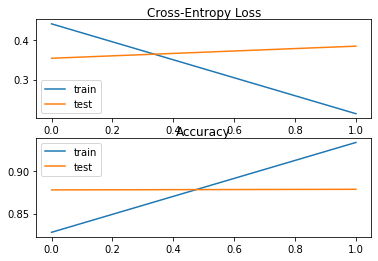

In [ ]:
# evaluate the model
from matplotlib import pyplot
_, train_acc = model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**Latih model menggunakan Early Stopping dengan menambah parameter patience = 200**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras import callbacks
# patience simple early stopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4000,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1, 
                    callbacks=[es])

Epoch 1/4000
30/30 [==============================] - 2s 45ms/step - loss: 1.1621 - accuracy: 0.5265 - val_loss: 0.6057 - val_accuracy: 0.6479
Epoch 2/4000
30/30 [==============================] - 1s 35ms/step - loss: 0.5435 - accuracy: 0.7100 - val_loss: 0.4631 - val_accuracy: 0.7984
Epoch 3/4000
30/30 [==============================] - 1s 35ms/step - loss: 0.3949 - accuracy: 0.8514 - val_loss: 0.3687 - val_accuracy: 0.8549
Epoch 4/4000
30/30 [==============================] - 1s 35ms/step - loss: 0.2881 - accuracy: 0.9098 - val_loss: 0.3195 - val_accuracy: 0.8772
Epoch 5/4000
30/30 [==============================] - 1s 36ms/step - loss: 0.2091 - accuracy: 0.9395 - val_loss: 0.3343 - val_accuracy: 0.8845
Epoch 6/4000
30/30 [==============================] - 1s 35ms/step - loss: 0.1428 - accuracy: 0.9588 - val_loss: 0.3980 - val_accuracy: 0.8821
Epoch 7/4000
30/30 [==============================] - 1s 34ms/step - loss: 0.1024 - accuracy: 0.9750 - val_loss: 0.4532 - val_accuracy: 0.8779

Dari latih model yang telah kita tambahkan patience, kita dapat melihat bahwa val_accuracy justru semakin rendah yaitu bernilai 0.8438 pada epoch ke 204 sehingga dapat disimpulkan model ini tidak berhasil meningkatkan nilai akurasi jika dibandingkan dengan model yang sebelumnya 

**Latih model menggunakan Early Stopping dengan menggunakan CheckPoint**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# add checkpoint
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4000,
                    validation_data=(x_val, y_val),
                    verbose=0, 
                    callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.87730, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.87730 to 0.87780, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.87780

Epoch 00004: val_accuracy did not improve from 0.87780

Epoch 00005: val_accuracy did not improve from 0.87780

Epoch 00006: val_accuracy did not improve from 0.87780

Epoch 00007: val_accuracy did not improve from 0.87780

Epoch 00008: val_accuracy did not improve from 0.87780

Epoch 00009: val_accuracy did not improve from 0.87780

Epoch 00010: val_accuracy did not improve from 0.87780

Epoch 00011: val_accuracy did not improve from 0.87780

Epoch 00012: val_accuracy did not improve from 0.87780

Epoch 00013: val_accuracy did not improve from 0.87780

Epoch 00014: val_accuracy did not improve from 0.87780

Epoch 00015: val_accuracy did not improve from 0.87780

Epoch 00016: val_accuracy did not improve from 0.87780

Epoch 00017: val_accuracy did not im

model kita berhenti pada Epoch ke 202 yang memiliki nilai sebesar 0.8778

In [ ]:
from keras import models
# load the saved model
saved_model = models.load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.981, Test: 0.878


**Kesimpulan**


Dari model - model yang digunakan, dapat terlihat bahwa model dengan menggunakan Early Stopping dengan membuat Checkpoint memiliki akurasi yang lebih unggul dibandingkan tanpa menggunakan Early Stopping. Sehingga dapat terlihat pelatihan data berhenti pada Epoch 202 dengan nilai akurasi sebesat 0.8787.